# Analyzing the initial route data
This data was collected manually.

In [1]:
import pandas as pd
import numpy as np


/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('routes.csv')

In [3]:
df.head()
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns
df.head()

,city_a,city_a_formatted,city_b,city_b_formatted,distance,color,tunnel,ferry,ferry_count,lat_city_a,long_city_a,lat_city_b,long_city_b
0,Edinburgh,"Edinburgh, Scotland",London,"London, England",4,Blue,0,0,NaN,55.953252,-3.188267,51.507218,-0.127586
1,Edinburgh,"Edinburgh, Scotland",London,"London, England",4,Orange,0,0,NaN,55.953252,-3.188267,51.507218,-0.127586
2,London,"London, England",Dieppe,"Dieppe, France",2,Grey,0,1,1.0,51.507218,-0.127586,49.922992,1.077483
3,London,"London, England",Dieppe,"Dieppe, France",2,Grey,0,1,1.0,51.507218,-0.127586,49.922992,1.077483
4,London,"London, England",Amsterdam,"Amsterdam, Netherlands",2,Grey,0,1,2.0,51.507218,-0.127586,52.367573,4.904139


# Preliminary Analysis
### Counting the cities with the most train traffic 
i.e. The most train routes in and out of the city

In [4]:
df[df.city_a == 'Paris']

,city_a,city_a_formatted,city_b,city_b_formatted,distance,color,tunnel,ferry,ferry_count,lat_city_a,long_city_a,lat_city_b,long_city_b
23,Paris,"Paris, France",Zürich,"Zurich, Switzerland",3,Grey,1,0,NaN,48.856614,2.352222,47.376887,8.541694
24,Paris,"Paris, France",Bruxelles,"Brussels, Belgium",2,Yellow,0,0,NaN,48.856614,2.352222,50.847642,4.357170
25,Paris,"Paris, France",Bruxelles,"Brussels, Belgium",2,Red,0,0,NaN,48.856614,2.352222,50.847642,4.357170
26,Paris,"Paris, France",Frankfurt,"Frankfurt, Germany",3,White,0,0,NaN,48.856614,2.352222,50.110922,8.682127
27,Paris,"Paris, France",Frankfurt,"Frankfurt, Germany",3,Orange,0,0,NaN,48.856614,2.352222,50.110922,8.682127
100,Paris,"Paris, France",Pamplona,"Pamplona, Spain",4,Green,0,0,NaN,48.856614,2.352222,42.812526,-1.645774


In [5]:
df[df.city_b == 'Paris']

,city_a,city_a_formatted,city_b,city_b_formatted,distance,color,tunnel,ferry,ferry_count,lat_city_a,long_city_a,lat_city_b,long_city_b
6,Dieppe,"Dieppe, France",Paris,"Paris, France",1,Pink,0,0,NaN,49.922992,1.077483,48.856614,2.352222
8,Brest,"Brest, France",Paris,"Paris, France",3,Blue,0,0,NaN,48.390394,-4.486076,48.856614,2.352222
13,Pamplona,"Pamplona, Spain",Paris,"Paris, France",4,Blue,0,0,NaN,42.812526,-1.645774,48.856614,2.352222
20,Marseille,"Marseille, France",Paris,"Paris, France",4,Grey,0,0,NaN,43.296482,5.369780,48.856614,2.352222


## Paris has the most routes in and out. 
But, we know from our preliminary analysis of the ticket cards that Paris is not the most common origin or destination city. This tells us that Paris is simply a desirable or common waypoint on players' greater journeys.

<AxesSubplot:title={'center':'Cities with the most train routes'}>

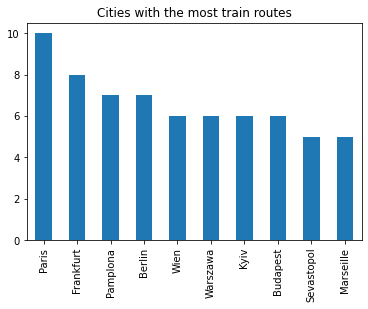

In [206]:
a = df.city_b.value_counts()
b = df.city_a.value_counts()
a.add(b,fill_value=0)

total_tracks = a.add(b,fill_value=0)
total_tracks.sort_values(ascending=False).head(10).plot(kind='bar', title='Cities with the most train routes')


In [207]:
# Creating a new dataframe with each city appearing once to store summary statistics about each city 

df_city = a.add(b,fill_value=0).to_frame(name='train_routes_per_city')

df_city.head()

,train_routes_per_city
Amsterdam,4.0
Angora,3.0
Athína,4.0
Barcelona,3.0
Berlin,7.0


In [208]:
df.head()

,city_a,city_b,distance,color,tunnel,ferry,ferry_count
0,Edinburgh,London,4,B,0,0,NaN
1,Edinburgh,London,4,O,0,0,NaN
2,London,Dieppe,2,X,0,1,1.0
3,London,Dieppe,2,X,0,1,1.0
4,London,Amsterdam,2,X,0,1,2.0


## Tunnel Analysis
Tunnels are a new addition to the game. The presence of a tunnel on your way from Point A to Point B means you may need to fork over an additional train card in order to make your connection, making them slighly more risky to build. 

Tunnel routes often appear on routes that would otherwise go through mountains. We see here that Zurich is one of the most difficult cities to reach, with a count of four tunnel routes. 

<AxesSubplot:title={'center':'Cities with the most adjacent tunnels'}>

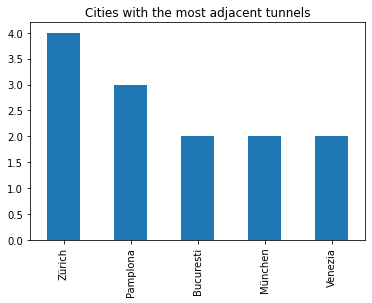

In [209]:
a = df[df.tunnel == 1].city_a.value_counts()
b = df[df.tunnel == 1].city_b.value_counts()


# a = df.city_b.value_counts()
# b = df.city_a.value_counts()
a.add(b,fill_value=0).sort_values(ascending=False).head().plot(kind='bar', title='Cities with the most adjacent tunnels')

# NOTE: What would really be interesting is looking at ratio of tunnel tracks vs total tracks 
# it might be worth making a new df with all of the city names mentioned once with information like this? to track all of the summary stats 

In [210]:
df.tunnel.sum()
#there are 18 routes that require tunnels

18

In [211]:
df_city['tunnel_count'] = a.add(b,fill_value=0)
#df_city

In [212]:
df.head()

,city_a,city_b,distance,color,tunnel,ferry,ferry_count
0,Edinburgh,London,4,B,0,0,NaN
1,Edinburgh,London,4,O,0,0,NaN
2,London,Dieppe,2,X,0,1,1.0
3,London,Dieppe,2,X,0,1,1.0
4,London,Amsterdam,2,X,0,1,2.0


## Ferry analysis
Ferries are another new feature on Ticket to Ride: Europe. In order to build a ferry route, a player has to have a special "rainbow" train card. London, England; Palermo, Italy; and Stevaspol in the Crimean peninsula each have three ferry routes. 

<AxesSubplot:title={'center':'Distribution of number of ferry routes of cities requiring at least one ferry'}>

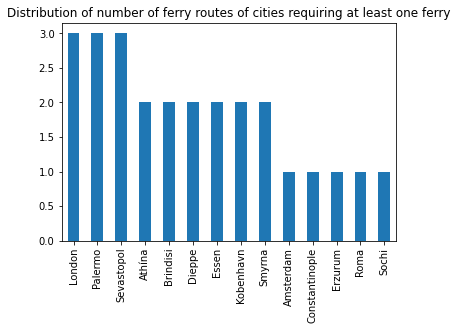

In [213]:
a = df[df.ferry == 1].city_a.value_counts()
b = df[df.ferry == 1].city_b.value_counts()


# a = df.city_b.value_counts()
# b = df.city_a.value_counts()
a.add(b,fill_value=0).sort_values(ascending=False).plot(kind='bar', title='Distribution of number of ferry routes of cities requiring at least one ferry')

# NOTE: same as above for ratio to ferry routes vs total routes for each city 

In [217]:
df_city['ferry_route_count'] = a.add(b,fill_value=0)
df_city.to_csv('Europe_city_info.csv')

In [131]:
df.ferry.sum()
#there are 13 routes that require ferries
df.ferry_count.sum()
# And there are 17 total ferries needed on the board (17 ferries spread over 13 routes)

17.0

## Distribution of route lengths (measured in train cars)
While also difficult to look at, this plot shows the distribution of route lengths. We can see that the vast majority of routes require between two and four train cars, while the longest route between Stockholm, Sweeden and St. Petersburg, Russia (labeled as "Petrograd" on the board) requires eight train cars and can earn a single player 21 points.  

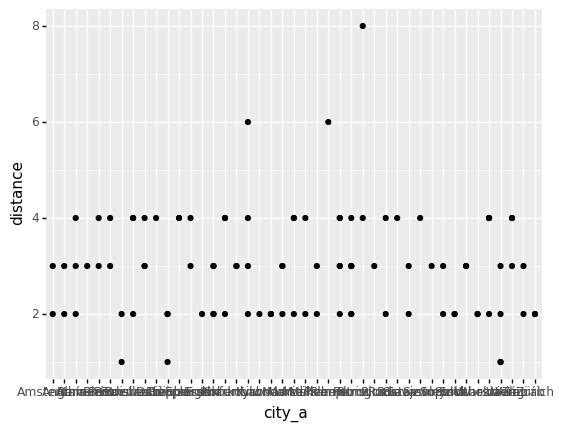

<ggplot: (300176267)>

In [152]:
from plotnine import ggplot, aes, geom_point, facet_wrap, theme_void

(
    ggplot(df,
          aes('city_a', 'distance'))
        + geom_point()
)



## Adding in Tunnels to the above
Here we see the same plot, but by routes that require tunnels and those that do not.

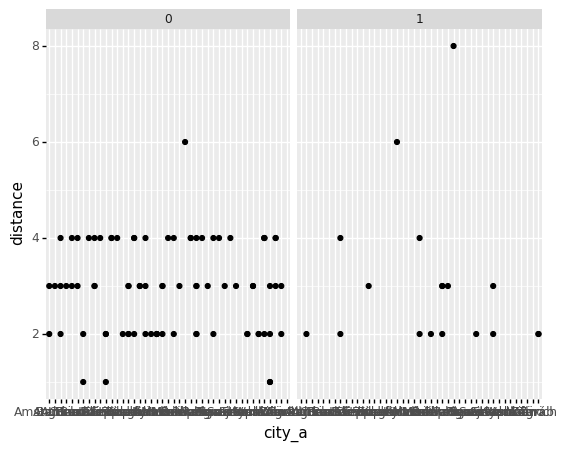

<ggplot: (284374419)>

In [6]:

from plotnine import ggplot, aes, geom_point, facet_wrap

(
    ggplot(df,
          aes('city_a', 'distance'))
        + geom_point()
        + facet_wrap('tunnel')
)

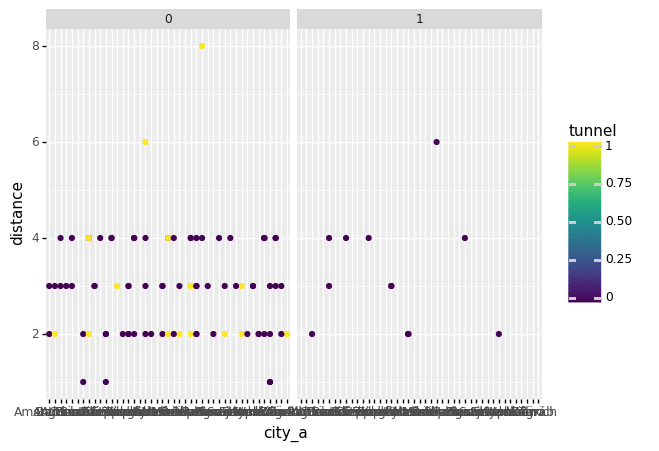

<ggplot: (300572597)>

In [156]:
# This shows the distribution of route lengths, separated by "Ferry" routes and non-ferry routes
    # Ferry routes require a rainbow locamotive in order to build  
        # I've also added a color for the "Tunnel" category; there are no Ferry routes that are also Tunnels
            # This makes sense! Why would you need a boat and an underground train at the same time, afterall? 
        
#COME BACK: is color in the right place?

from plotnine import ggplot, aes, geom_point, facet_wrap

(
    ggplot(df,
          aes('city_a', 'distance', color='tunnel'))
        + geom_point()
        + facet_wrap('ferry')
)